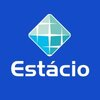

**Campus:** Estácio 

**Curso:** Desenvolvimento Full Stack

**Disciplina:** Conhecendo Novos Paradigmas 

**Turma:** 2022.2

**Semestre Letivo:** 1

**Título da Prática:** Implementar um programa orientado a objetos para visualizar e aplicar regressão linear em séries temporais.

**Objetivo da Prática:** Aplicar as técnicas de programação orientará a objetos, manipulação de dicionários e comandos interativos para produção de gráficos no Python e para obter a regressão linear de uma série temporal. Entrar com listas de despesas por dia e o programa deve produzir: gráficos com visualização das séries temporais de despesas; gráfico com a regressão linear da série temporal.

**Aluno:** Thayrine Damasceno Rodrigues

**GitHub:** https://github.com/thayrinedr

**LinkedIn:** https://www.linkedin.com/in/thayrinedr/

# 1 Descrição
Algoritmo orientado a objetos para visualizar e aplicar Regressão Linear em séries temporais.

# 2 Importar pacotes

In [2]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# 3 Entrada de dados

In [3]:
dados_entrada = {
    'alimentacao': {1: 1000, 5: 1000, 7: 1500, 17: 1500, 20: 1700, 29: 2000},
    'vestuario': {1: 1200, 3: 1300, 5: 1500, 7: 1500, 15: 1300, 20: 1150, 27: 1100},
    'transporte': {1: 1000, 3: 1000, 5: 1500, 7: 1500, 10: 2000, 15: 2000, 20: 2700, 27: 2500}
}

# 4 Cálculos intermediários

In [4]:
class Despesa:
    def __init__(self, dados, cor, nome):
        self.dados = dados
        self.cor = cor
        self.nome = nome

In [5]:
class Grafico:
    def __init__(self, dados):
        self.dados = dados
        self.imprimir_graficos()

    def padrao_do_grafico(self):
        plt.xlabel('Dia')
        plt.ylabel('Despesas (R$)')
        plt.title('Gráficos de Despesas')

    def imprimir_graficos(self):
        self.padrao_do_grafico()

        for serie_temporal in self.dados:
            m_lista = serie_temporal.dados.items()
            cor = serie_temporal.cor
            nome = serie_temporal.nome
            x, y = zip(*m_lista)
            plt.plot(x, y, label=nome,
                     marker='o', markerfacecolor=cor,
                     markersize=10, color=cor, linewidth=4)

        plt.legend()
        plt.show()

    def regressao_linear(self, id_grafico):
        self.padrao_do_grafico()

        serie_temporal = self.dados[id_grafico]
        m_lista = serie_temporal.dados.items()
        cor = serie_temporal.cor
        nome = serie_temporal.nome
        dias, valores = zip(*m_lista)
        dias = np.array(dias)
        valores = np.array(valores)
        dias = dias.reshape(-1, 1)
        valores = valores.reshape(-1, 1)
        regr = LinearRegression()
        regr.fit(X=dias, y=valores)
        plt.plot(dias, regr.predict(dias), 
                color='blue',
                label = "Regressão Linear")

        x, y = zip(*m_lista)
        plt.plot(x, y, label = nome+str(" - original"), 
                marker='o', 
                markerfacecolor=cor, 
                markersize=10, 
                color=cor, 
                linewidth=4)

        plt.legend()
        plt.show()

In [6]:
alimentacao = Despesa(dados=dados_entrada['alimentacao'], cor='skyblue', nome='Alimentação')
vestuario = Despesa(dados=dados_entrada['vestuario'], cor='red', nome='Vestuário')
transporte = Despesa(dados=dados_entrada['transporte'], cor='olive', nome='Transporte')

lista_despesas = [alimentacao, vestuario, transporte]

# 5 Apresentação dos resultados

Apresentação gráfica das séries temporais de despesas com alimentação, vestuário e transporte.

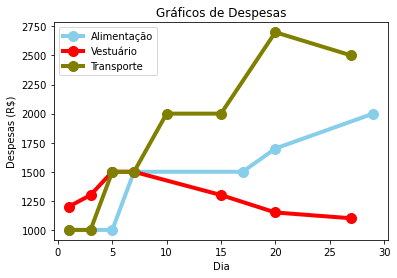

In [7]:
grafico = Grafico(lista_despesas)

Apresentação gráfica da série temporal de despesas com alimentação e aplicação de Regressão Linear. Observa-se neste gráfico uma tendência de alta para as despesas com alimentação.

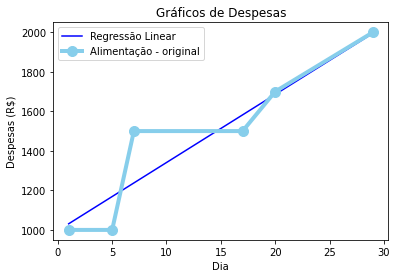

In [8]:
id_despesa_alimentacao = 0
grafico.regressao_linear(id_grafico=id_despesa_alimentacao)

Apresentação gráfica da série temporal de despesas com vestuário e aplicação de Regressão Linear. Observa-se neste gráfico uma tendência de baixa para as despesas com vestuário.

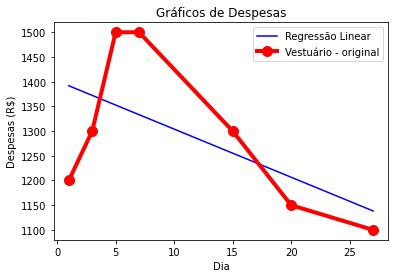

In [9]:
id_despesa_vestuario = 1
grafico.regressao_linear(id_grafico=id_despesa_vestuario)

Apresentação gráfica da série temporal de despesas com transporte e aplicação de Regressão Linear. Observa-se neste gráfico uma tendência de alta para as despesas com transporte.

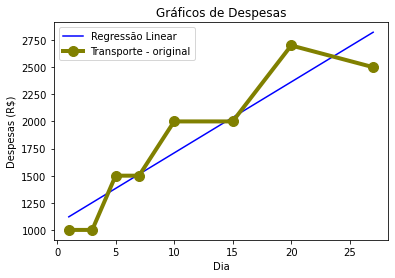

In [10]:
id_despesa_transporte = 2
grafico.regressao_linear(id_grafico=id_despesa_transporte)